In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
Url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic = pd.read_csv(Url)
titanic.columns =['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
titanic.corr()

<ipython-input-4-c1c691e9860d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [5]:
titanic.groupby('Pclass').mean()

<ipython-input-5-288bab41a485>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  titanic.groupby('Pclass').mean()


,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [6]:
titanic[titanic['Cabin'].isnull()]['Pclass'].value_counts()

3    479
2    168
1     40
Name: Pclass, dtype: int64

In [7]:
titanic[titanic['Pclass']==1]['Survived'].value_counts()

1    136
0     80
Name: Survived, dtype: int64

In [8]:
titanic[titanic['Pclass']==2]['Survived'].value_counts()

0    97
1    87
Name: Survived, dtype: int64

In [9]:
titanic[titanic['Pclass']==3]['Survived'].value_counts()

0    372
1    119
Name: Survived, dtype: int64

Text(0.5, 1.0, 'No of people survived according to the class')

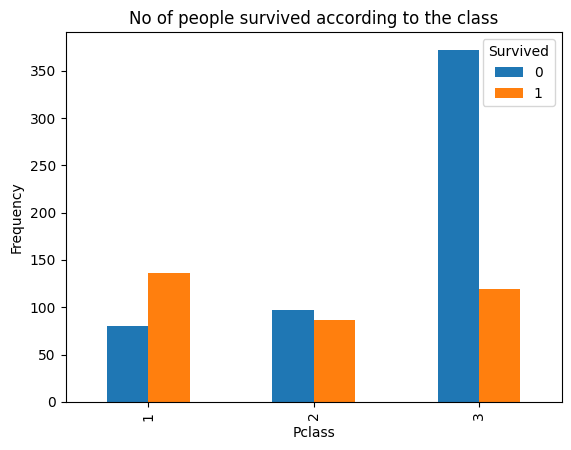

In [10]:
pd.crosstab(titanic.Pclass, titanic.Survived).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('No of people survived according to the class')

In [11]:
titanic[titanic['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [12]:
titanic['Fare'] = titanic['Fare'].replace(0,titanic['Fare'].mean())

In [13]:
titanic.drop('Cabin',axis=1,inplace=True) #The survival is not depend on the cabin
titanic['Age'].fillna(titanic['Age'].median(), inplace=True) #The survival may be depend on the Age because old think that, grandspa's and parents may sent their kids out of the ship.

In [14]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [15]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

In [16]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
titanic['GenderClass'] = titanic.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)

In [18]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,male


In [19]:
titanic.drop(['Name','Sex','Ticket'],axis=1,inplace=True)

In [20]:
titanic.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [21]:
titanic.GenderClass.unique()

array(['male', 'female', 'child'], dtype=object)

In [22]:
Embarked_category = {'S':1,'C':2,'Q':3}
GenderClass_category = {'male':1,'female':2,'child':3}

In [23]:
titanic['Embarked'] = titanic['Embarked'].replace(Embarked_category)
titanic['GenderClass'] = titanic['GenderClass'].replace(GenderClass_category)

In [24]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,GenderClass
0,1,0,3,22.0,1,0,7.2500,1,1
1,2,1,1,38.0,1,0,71.2833,2,2
2,3,1,3,26.0,0,0,7.9250,1,2
3,4,1,1,35.0,1,0,53.1000,1,2
4,5,0,3,35.0,0,0,8.0500,1,1


In [25]:
titanic['Family'] = titanic['SibSp'] + titanic['Parch'] + 1

In [26]:
titanic.drop(['SibSp','Parch'],axis=1,inplace=True)

In [27]:
titanic.head()

,PassengerId,Survived,Pclass,Age,Fare,Embarked,GenderClass,Family
0,1,0,3,22.0,7.2500,1,1,2
1,2,1,1,38.0,71.2833,2,2,2
2,3,1,3,26.0,7.9250,1,2,1
3,4,1,1,35.0,53.1000,1,2,2
4,5,0,3,35.0,8.0500,1,1,1


Text(0.5, 1.0, 'Correlation between features')

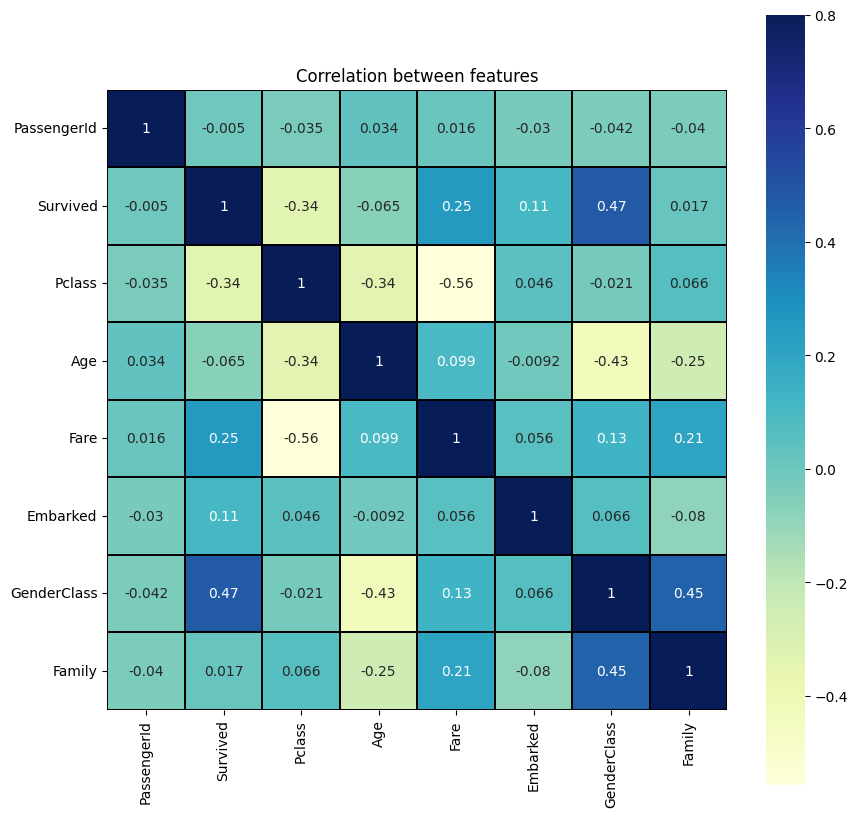

In [28]:
corr = titanic.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

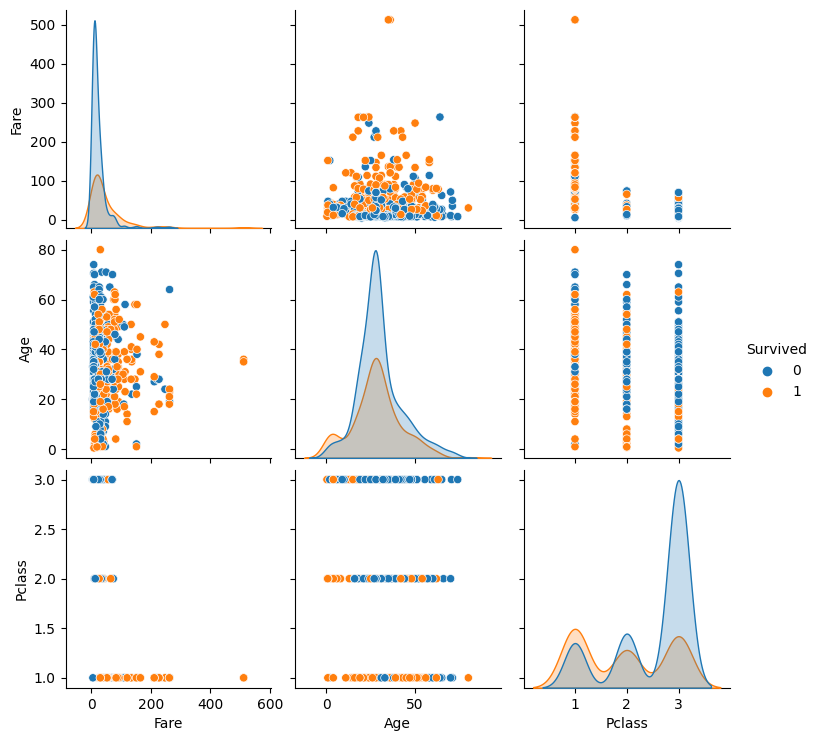

In [29]:
sns.pairplot(titanic[["Fare","Age","Pclass","Survived"]],vars = ["Fare","Age","Pclass"],hue="Survived",dropna=True)

In [30]:
X = titanic.loc[:,titanic.columns != 'Survived']
X.head()

,PassengerId,Pclass,Age,Fare,Embarked,GenderClass,Family
0,1,3,22.0,7.2500,1,1,2
1,2,1,38.0,71.2833,2,2,2
2,3,3,26.0,7.9250,1,2,1
3,4,1,35.0,53.1000,1,2,2
4,5,3,35.0,8.0500,1,1,1


In [31]:
y = titanic.Survived
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=40)
print(X_train.shape)
print(X_test.shape)

(623, 7)
(268, 7)


In [46]:
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
import sys
!{sys.executable} -m pip install graphviz
!{sys.executable} -m pip install pydotplus
!{sys.executable} -m pip install Ipython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.9 MB/s eta 0:00:00


In [47]:
import pydotplus
from IPython.display import Image

dot_tree = tree.export_graphviz(model, out_file=None,filled=True, rounded=True,
                                special_characters=True, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_tree)

Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

In [48]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [49]:
print('Accuracy of the Train Set',accuracy_score(y_train,y_pred_train))
print('Accuracy of the Test Set',accuracy_score(y_test,y_pred_test))


Accuracy of the Train Set 1.0
Accuracy of the Test Set 0.7350746268656716


In [52]:
import pandas as pd
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                 122                  34
Actual Survived              37                  75


In [53]:
from sklearn import tree
path = tree.DecisionTreeClassifier(random_state=0).cost_complexity_pruning_path(X_train,y_train)
alphas = path['ccp_alphas']
alphas

array([0.        , 0.00075798, 0.00101659, 0.00103442, 0.00104334,
       0.00107009, 0.00107009, 0.00120385, 0.00120385, 0.00133761,
       0.00133761, 0.00139355, 0.00139577, 0.00140449, 0.00140449,
       0.00140449, 0.00140449, 0.00142679, 0.00144462, 0.00144462,
       0.00144462, 0.00145889, 0.00146094, 0.00151074, 0.00156055,
       0.00158153, 0.00160514, 0.00160514, 0.001651  , 0.00170742,
       0.00171215, 0.00173355, 0.00174295, 0.00176139, 0.00192616,
       0.00200571, 0.00200642, 0.00214018, 0.00216693, 0.00216693,
       0.00232628, 0.00243032, 0.00248147, 0.00252236, 0.00256822,
       0.00267523, 0.00272387, 0.00275166, 0.00281969, 0.00344244,
       0.00375107, 0.00389482, 0.00587045, 0.00634481, 0.0103999 ,
       0.01836386, 0.04088443, 0.13773534])

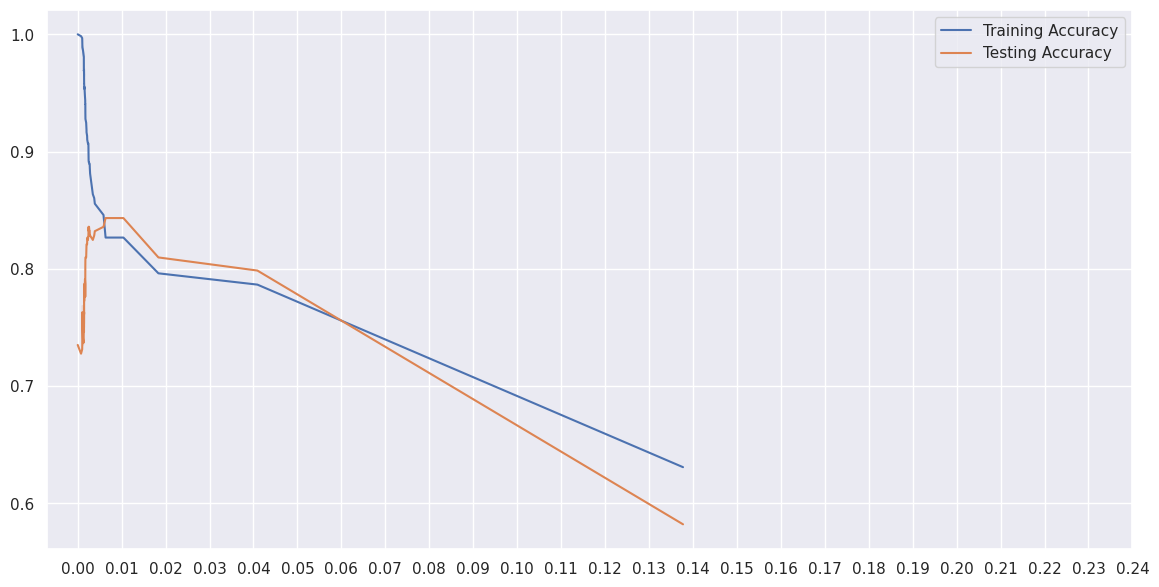

In [54]:
from sklearn.tree import DecisionTreeClassifier
accuracy_train,accuracy_test = [],[]
for i in alphas:
  model = DecisionTreeClassifier(ccp_alpha = i)
  model.fit(X_train,y_train)
  y_train_pred=model.predict(X_train)
  y_test_pred = model.predict(X_test)

  accuracy_train.append(accuracy_score(y_train,y_train_pred))
  accuracy_test.append(accuracy_score(y_test,y_test_pred))
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=alphas,label="Training Accuracy")
sns.lineplot(y=accuracy_test,x=alphas,label="Testing Accuracy")
plt.xticks(ticks=np.arange(0.00,0.25,0.01))
plt.show()

In [61]:
# Model creation using grid search CV and parameter tuning
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = tree.DecisionTreeClassifier(ccp_alpha = 0.005)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]



grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(ccp_alpha=0.005),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                          'max_features': ['sqrt', 'log2', None]}],
             refit='AUC')

In [62]:
y_pred_test1 = grid_search.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test1))
# Accuracy score for test data is: 0.832089552238806 for ccp_alpha = 0.005
# Accuracy score for test data is: 0.8097014925373134 for ccp_alpha = 0.06

Accuracy score for test data is: 0.832089552238806


In [63]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test1))

confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                 138                  18
Actual Survived              27                  85
